# libraries

In [1]:
#libraries and dirrectory 
import pandas as pd
import numpy as np
import os
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from scipy.optimize import curve_fit
import patientFunctions as ptfn
import seaborn as sns
import matplotlib.pyplot as plt
import re
import matplotlib.patches as mpatches


# directories

In [2]:
#location of original data
starting_directory = os.getcwd()


# machine_directory = 'C:/Users/mcremer' #the C and path to the project folder
machine_directory = 'C:/Users/maega' #when working from home machine
storage_directory = 'UFL Dropbox/Maegan Cremer/research-share/Maegan/Projects' #Local, HPG, or dropbox
project_directory = 'Cardiac-Amyloidosis-Multiple-Myeloma' #project folder
project_lv2_directory = '012 Processed Data/data-2024-06-05' #deeper part of project folder

path = os.path.join(machine_directory, storage_directory, 
                    project_directory, project_lv2_directory)

new_dirrectory = path

os.chdir(new_dirrectory)

In [3]:
#updates to directory management
# machine_directory = 'C:/Users/mcremer' #the C and path to the project folder
machine_directory = 'C:/Users/maega' #when working from home machine
storage_directory = 'UFL Dropbox/Maegan Cremer/research-share/Maegan/Projects' #Local, HPG, or dropbox
project_directory = 'Cardiac-Amyloidosis-Multiple-Myeloma' #project folder
project_lv2_directory = '017_Mistic_noNotes_t-60' #deeper part of project folder

path = os.path.join(machine_directory, storage_directory, 
                    project_directory, project_lv2_directory)

# parent_dir = path
outputDir = path

In [4]:
folderNameHeader = "StatsVisuals_"
folderNameCommon = ""
folderNameSuffix = "_20250508"

# fileNameHeader_1 = "DF_SelectedFeats_"
# # fileNameHeader_2 = "ALUnknownPts"
# # fileNameCommon = "_Features"
# fileNameSuffix = "_20250416"

folder_data_out = ptfn.makeFolderPathForData(parent_dir=outputDir, folderName_header=folderNameHeader, 
                                        folderName_common=folderNameCommon, folderName_suffix=folderNameSuffix)


folderNameOut = folder_data_out

# import data

## patient info

In [5]:
#importing patient data as dictionaries of dataframes

#build a dictionary of patients and their values 
ptFiles = ptfn.GetListofPTfiles(new_dirrectory, '.xlsx', 'data')

ptDict = {}

#loop through the listOfPatients 
for file in ptFiles: 
    pt = ptfn.patient(new_dirrectory, file, 4)
    ptDict[pt.ptID] = pt

In [6]:
EchoTimeColumn ='time from diagnosis to first echo (months)'
MRITimeColumn = 'time from dagnosis to MRI (months)'
echoDates = {}
for pt in ptDict.keys():
    ptEchoData = ptDict[pt].echoData
    patientEchoDate = ptEchoData[EchoTimeColumn]
    if 'none' not in list(patientEchoDate):
        echoDates[pt] = patientEchoDate

#test to see if this still runs and if the data is correct

In [7]:
#list of patients by amyloid status 

listPositive = []
listNegative = []
listOther = []

#T-01 was added to the list of patients to remove for having no note data
list_pts_remove = ["K-01", "G-01", "J-01", "L-02"]
#remove list_pts_remove from ptDict
for pt in list_pts_remove:
    if pt in ptDict:
        del ptDict[pt]

#get list of positive patients 
for pt in ptDict:
    ptALStatus = ptDict[pt].amyloid_status
    if ptALStatus == 'yes':
        listPositive.append(pt)
    elif ptALStatus == 'no':
        listNegative.append(pt)
    else:
        listOther.append(pt)


In [8]:

listKnown = listPositive + listNegative

In [9]:
#changing dictionary of patients to only those with known status
#this fixes issues throughout the code where ptDict.keys() was used instead of listKnown
for pt in listOther:
    ptDict.pop(pt)

## trim time to no later than 60 days before diagnosis

In [10]:
labsTimeColumn = 'RelTime(Days)'
# noteTimeColumn = 'time from diagnosis to note (months)'

for pt in ptDict.keys(): 
    #pull each data input type (labs and notes) and filter for only positive time
    ptLabs = ptDict[pt].labsData
    ptDict[pt].labsData = ptLabs.loc[ptLabs[labsTimeColumn] >= -60].reset_index()

    # #repeat for the note column 
    # ptNotes = ptDict[pt].MDnotes
    # ptDict[pt].MDnotes = ptNotes.loc[ptNotes[noteTimeColumn]>= 0].reset_index()


## list of labs

In [11]:
os.chdir(path) #chaning directory to the location of our sheets

In [13]:
os.getcwd()

'C:\\Users\\maega\\UFL Dropbox\\Maegan Cremer\\research-share\\Maegan\\Projects\\Cardiac-Amyloidosis-Multiple-Myeloma\\017_Mistic_noNotes_t-60'

In [14]:
#to get only the lab names used as stems of features
labsFiltered = pd.read_excel("DFsForSVM_noNotes_t-60__20250506_v1\SelectedFeatures_labs__20250506_v1.xlsx")
labsFiltered = list(labsFiltered[0])

## features dataframes

In [16]:
# full dataframe for the DescFits model
DescFitsFullFeatureList = pd.read_excel("DFsForSVM_noNotes_t-60__20250506_v1\DF_SVM_noNotes_t-60_DescFits_sk__20250506_v1.xlsx")
DescFitsFullFeatureList.index = DescFitsFullFeatureList["DeID"]

In [17]:
#full dataframe for the EchoAdj model 
EchoAdjFullFeatureList = pd.read_excel("DFsForSVM_noNotes_t-60__20250506_v1\DF_SVM_noNotes_t-60_EchoAdj__20250506_v1.xlsx")
EchoAdjFullFeatureList.index = EchoAdjFullFeatureList["DeID"]

In [23]:
#labs adjacent to diagnositic imaging
#use the EchoAdj full feature list, but remove the dummy variables 
ImagingAdjValues = EchoAdjFullFeatureList.replace(-1, np.nan)

# temporary variables

In [20]:
featureRed = 0.25 #feature reduction value of interest
modelNames = ['EchoAdj', 'DescOnly', 'ParamsOnly', 'DescFits']

## features selected for each model 

In [ ]:
selectedFeatures_allmodels_allfeatRed = pd.read_excel("SVM_model_comparison_noNotes_t-60.xlsx", sheet_name = "best feats", header = [0,1]).drop([0], axis = 0)

In [ ]:
featureRed = 0.25 #feature reduction value of interest

#pull selected features for the models with the given feature reduction
selectedFeats_025_allmodels = selectedFeatures_allmodels_allfeatRed.xs(featureRed, axis = 1, level = 1)

#list of models 
modelNames = list(selectedFeats_025_allmodels.columns)

In [ ]:
selectedFeaturesFolder = "DF_SelectedFeats_20250508"
selectedFeaturesFiles = os.listdir(selectedFeaturesFolder)

In [ ]:
dict_selectedFeatures_dfs = {}

for fileName in selectedFeaturesFiles:
    for name in modelNames: 
        if name in fileName and str(featureRed).replace(".", "") in fileName:
            print(name, " with feature reduction ", str(featureRed), " is in ", fileName)
            data = pd.read_excel(os.path.join(selectedFeaturesFolder, fileName))
            data.index = data["DeID"]
            dict_selectedFeatures_dfs[name] = data.drop("DeID", axis = 1)

DescFits  with feature reduction  0.25  is in  DF_SelectedFeats_DescFits_025__20250416.xlsx
DescOnly  with feature reduction  0.25  is in  DF_SelectedFeats_DescOnly_025__20250416.xlsx
EchoAdj  with feature reduction  0.25  is in  DF_SelectedFeats_EchoAdj_025__20250416.xlsx
ParamsOnly  with feature reduction  0.25  is in  DF_SelectedFeats_ParamsOnly_025__20250416.xlsx


## stats dataframes

In [18]:
statsFolder = "MannWhitneyFeaturesStats"
statsFiles = os.listdir(statsFolder)

In [24]:
dict_stats_allfeats_dfs = {}
dict_stats_selectedfeats_dfs = {}

df_stats_adjLabsOnly = [] #for the stats of ONLY imaging adjacent labs

for fileName in statsFiles:
    for name in modelNames: 
        if name in fileName and "selected" not in fileName:
            print(name, " is in ", fileName)
            data = pd.read_csv(os.path.join(statsFolder, fileName))
            data = data.rename(columns={"Unnamed: 0": "feature"})
            data.index = data["feature"]
            dict_stats_allfeats_dfs[name] = data
        if name in fileName and "selected" in fileName: 
            print(name, " is in ", fileName)
            data = pd.read_csv(os.path.join(statsFolder, fileName))
            data = data.rename(columns={"Unnamed: 0": "feature"})
            data.index = data["feature"]
            dict_stats_selectedfeats_dfs[name] = data
        if name not in fileName and "adjLabsOnly" in fileName: 
            print("Adjacent labs to date of imaging only: ", fileName)
            data =pd.read_csv(os.path.join(statsFolder, fileName))
            data = data.rename(columns={"Unnamed: 0": "feature"})
            data.index = data["feature"]
            df_stats_adjLabsOnly = data
            break


Adjacent labs to date of imaging only:  Multiple Mann-Whitney tests of adjLabsOnly.csv
DescFits  is in  Multiple Mann-Whitney tests of DescFits All Features.csv
DescOnly  is in  Multiple Mann-Whitney tests of DescOnly All Features.csv
ParamsOnly  is in  Multiple Mann-Whitney tests of ParamsOnly All Features.csv


In [22]:
dict_stats_allfeats_dfs.keys()

dict_keys(['DescFits', 'DescOnly', 'ParamsOnly'])

# visualizations

## swarm plot Echo

In [25]:
from sklearn.preprocessing import StandardScaler

#collect the echoAdj data and apply the standard scalar
ImagingAdj_forPlot = ImagingAdjValues[labsFiltered] #filtering for only selected labs

#fitting and applying the standard scaler to the data 
EchoAdjValues_StandardScalar = StandardScaler().fit(ImagingAdj_forPlot).transform(ImagingAdj_forPlot)

#setting the index and column names so that the data is searchable
EchoAdj_StandardScalar_df = pd.DataFrame(EchoAdjValues_StandardScalar, index=EchoAdjFullFeatureList.index, columns=labsFiltered)


c:\Users\maega\anaconda3\envs\BEAT-Labs_2024-08-02\lib\site-packages\seaborn\categorical.py:3399: UserWarning: 28.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\maega\anaconda3\envs\BEAT-Labs_2024-08-02\lib\site-packages\seaborn\categorical.py:3399: UserWarning: 35.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\maega\anaconda3\envs\BEAT-Labs_2024-08-02\lib\site-packages\seaborn\categorical.py:3399: UserWarning: 25.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\maega\anaconda3\envs\BEAT-Labs_2024-08-02\lib\site-packages\seaborn\categorical.py:3399: UserWarning: 60.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


Text(0.5, 157.7222222222222, 'Standardized Values')

c:\Users\maega\anaconda3\envs\BEAT-Labs_2024-08-02\lib\site-packages\seaborn\categorical.py:3399: UserWarning: 23.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


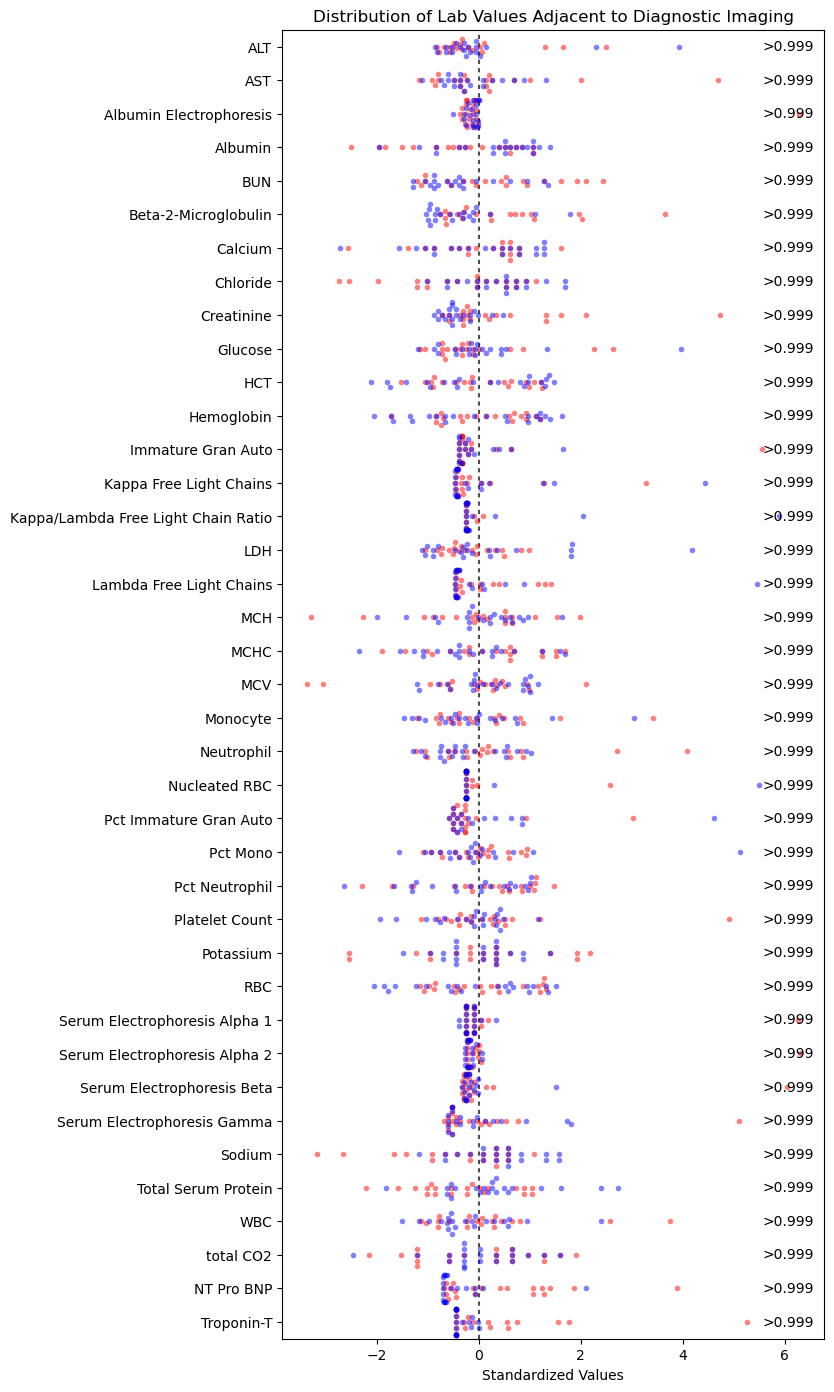

In [26]:
#swarm plots

#first collect the stats and values after standard scalar
data_afterScaler = EchoAdj_StandardScalar_df
stats_df = df_stats_adjLabsOnly

#ensure that the labs are in the same order 
stats_df = stats_df.reindex(data_afterScaler.T.index)

# Adding the swarm plot
fig, axs = plt.subplots(figsize=(7, 17))
sns.swarmplot(data_afterScaler.loc[listPositive], color='red', orient='h', size=4, alpha=0.5, ax=axs)
sns.swarmplot(data_afterScaler.loc[listNegative], color='blue', orient='h', size=4, alpha=0.5, ax=axs)

#adding central line for reference
axs.axvline(0, color=".3", dashes=(2, 2))

# Adding text descriptions for adjusted p-value
for i, feature in enumerate(stats_df.index.dropna()):
    pvalue = stats_df.loc[feature, "Adjusted P Value"]
    if not isinstance(pvalue, str):
        pvalue = round(pvalue, 3)
        #this rounds all numeric p values to 3 decimal places
    axs.text(0.98, i, f"{pvalue}", 
            va='center', ha='right', fontsize=10, color='black', transform=axs.get_yaxis_transform())
    
plt.title("Distribution of Lab Values Adjacent to Diagnostic Imaging")
axs.set_xlabel("Standardized Values")

## box plots of means of labs across the dataset

In [28]:
#collect the list of lab mean features from DescFits feature list
featureNames_means = [feature for feature in list(DescFitsFullFeatureList.columns) if "mean" in feature]


In [29]:
#filter the list again to only include lab values
labsNames_means_dict = {} #keys are labs, values are the lab_mean
for lab in labsFiltered: 
    for mean in featureNames_means:
        if lab in mean: 
            labsNames_means_dict[lab] = mean

In [30]:
#stats of means across patients for the filtered labs
#gather the means of labs per patient by CA status
df_labs_means_CApositive = DescFitsFullFeatureList.loc[listPositive][list(labsNames_means_dict.values())]
df_labs_means_CAnegative = DescFitsFullFeatureList.loc[listNegative][list(labsNames_means_dict.values())]

#descriptive stats
df_labs_means_CApositive_desc = df_labs_means_CApositive.describe().T.sort_values("mean")
df_labs_means_CAnegative_desc = df_labs_means_CAnegative.describe().T.sort_values("mean")

In [31]:
dict_plottingRanges = {"graph 10": [0, 0.5],
                       "graph 20": [0.6, 2],
                       "graph 30": [2, 10],
                       "graph 40": [11, 50],
                    #    "graph 50": [26, 50],
                       "graph 60": [51, 100],
                       "graph 70": [101, 400],
                       "graph 80" : [401, 1000],
                       "graph 90": [1000, 10000]}
dict_graph_column_groups = {}

for graph in dict_plottingRanges.keys():
    a, b = dict_plottingRanges[graph][0], dict_plottingRanges[graph][1]
    dict_graph_column_groups[graph]= df_labs_means_CAnegative_desc.index[(df_labs_means_CAnegative_desc['mean'] >a) & (df_labs_means_CAnegative_desc['mean'] <b)]
            
    

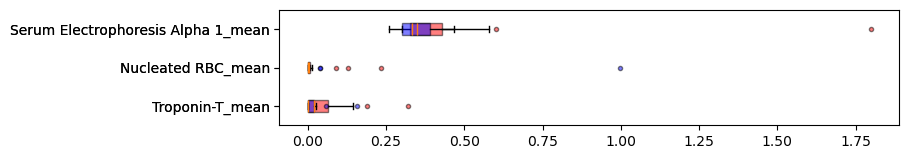

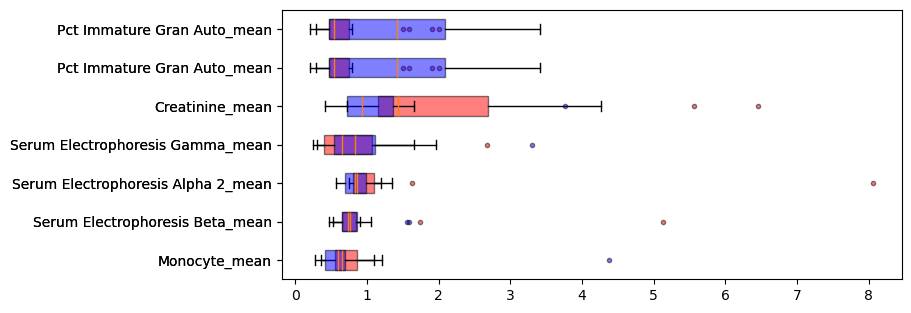

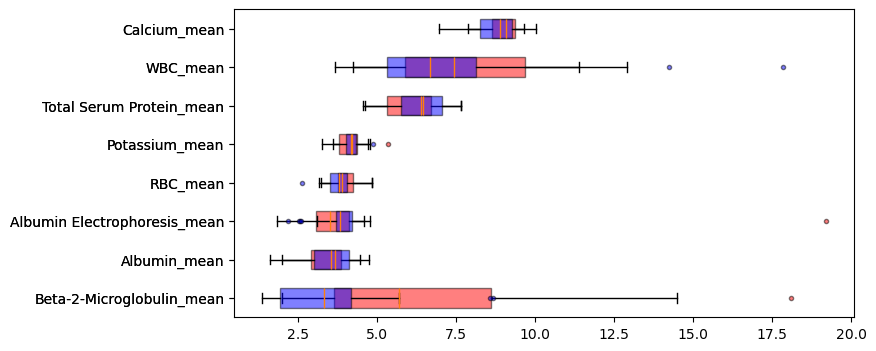

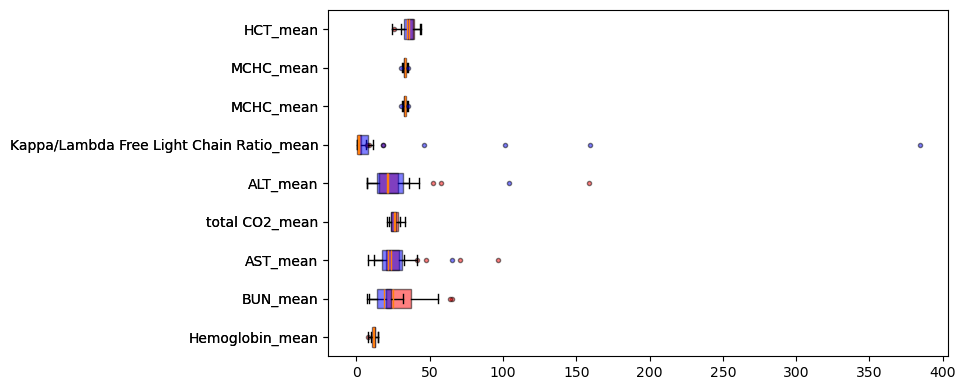

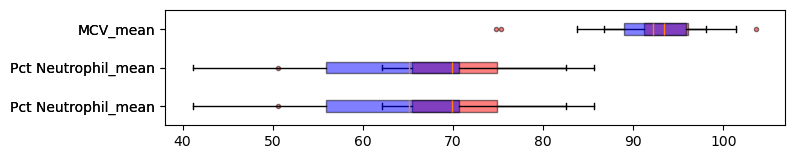

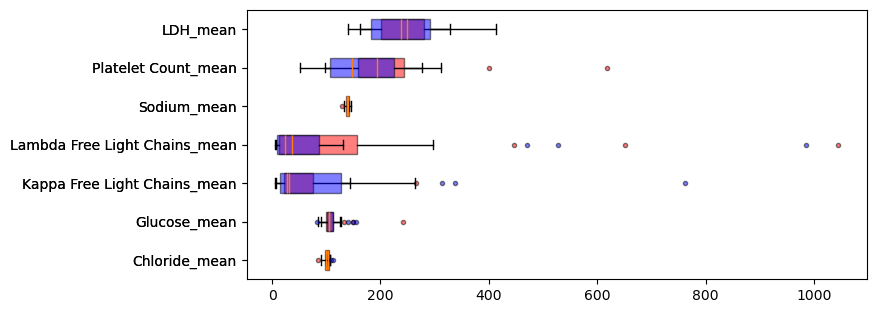

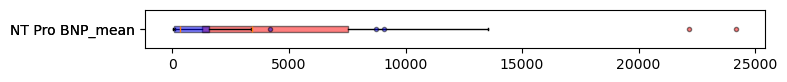

In [32]:
#plotting the distribution of means by CA status
figHeight = 0.5
for graph in dict_graph_column_groups.keys():
    #then plot the different pieces of data 
    if len(dict_graph_column_groups[graph]) >0: 
        fig, axs = plt.subplots(figsize = (8, len(dict_graph_column_groups[graph])*figHeight))
        plt.boxplot(DescFitsFullFeatureList.loc[listPositive][dict_graph_column_groups[graph]].dropna(),
                    vert= False, labels=dict_graph_column_groups[graph], patch_artist=True,
                    boxprops={"facecolor":"red", "alpha":0.5},
                    flierprops = {"marker" : '.', "markersize" : 6, "markerfacecolor" :'red', "alpha": 0.5})
        plt.boxplot(DescFitsFullFeatureList.loc[listNegative][dict_graph_column_groups[graph]].dropna(),
                    vert= False, labels=dict_graph_column_groups[graph], patch_artist=True,
                    boxprops={"facecolor":"blue", "alpha":0.5},
                    flierprops = {"marker" : '.', "markersize" : 6, "markerfacecolor" :'blue', "alpha": 0.5})
    

## small multiples plots